In [3]:
!date

Thu Oct 17 14:03:21 PDT 2024


In [4]:
%env CONDA_PREFIX

'/c4/home/derek/miniconda3/envs/py310'

In [37]:
import pandas as pd
import os

import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
import seaborn as sns
import numpy as np


In [49]:
input_SLR = '/c4/home/derek/data1/derek/data_scSLR/PBMC/STAR_outs/sample_2/'

input_10x = '/c4/home/derek/data1/derek/data_scSLR/PBMC/10X/STAR_outs/sample_2/StarOut_10X/'

input_VASA = '/c4/home/derek/data1/derek/reference/VASA/'

input_SS3_noUMI = '/c4/home/derek/data1/derek/data_scSLR/reference/SS3_PBMC/solo_outs_noUMI/'

input_SS3_yesUMI = '/c4/home/derek/data1/derek/data_scSLR/reference/SS3_PBMC/solo_outs_yesUMI/'


output_dir = './plots/'

In [50]:
pwd

'/nowakowskilab/data1/derek/scSLR/notebooks/fig2'

In [51]:
internal = pd.read_fwf(input_SLR+'read_distribution_internal.txt', 
            skiprows=list(range(0,7))+list(range(12,19)),
           )


fiveprime = pd.read_fwf(input_SLR+'read_distribution_5prime.txt', 
            skiprows=list(range(0,7))+list(range(12,19)),
           )

tenex = pd.read_fwf(input_10x+'read_distribution_10X.txt',
                    skiprows=list(range(0,7))+list(range(12,19)),
                   )


vasa = pd.read_fwf(input_VASA+'read_distribution_VASA.txt',
                    skiprows=list(range(0,7))+list(range(12,19)),
                   )


SS3_noUMI = pd.read_fwf(input_SS3_noUMI+'read_distribution_SS3_noUMI.txt',
                    skiprows=list(range(0,4))+list(range(9,19)),
                   )

SS3_yesUMI = pd.read_fwf(input_SS3_yesUMI+'read_distribution_SS3_yesUMI.txt',
                    skiprows=list(range(0,4))+list(range(9,19)),
                   )

In [52]:
# internal.index.name = None
# fiveprime.index.name = None

In [30]:
SS3_noUMI

,Group,Total_bases,Tag_count,Tags/Kb,Tag_count_percent,library
0,CDS_Exons,39659589,327271,8.25,0.307191,SS3 noUMI
1,5'UTR_Exons,26883670,23226,0.86,0.021801,SS3 noUMI
2,3'UTR_Exons,60399893,223468,3.70,0.209757,SS3 noUMI
3,Introns,1635215869,491402,0.30,0.461251,SS3 noUMI


In [53]:
internal['Tag_count_percent'] = internal.Tag_count.apply(lambda x: (x) / (internal.Tag_count.sum()))

fiveprime['Tag_count_percent'] = fiveprime.Tag_count.apply(lambda x: (x) / (fiveprime.Tag_count.sum()))

tenex['Tag_count_percent'] = tenex.Tag_count.apply(lambda x: (x) / (tenex.Tag_count.sum()))

vasa['Tag_count_percent'] = vasa.Tag_count.apply(lambda x: (x) / (vasa.Tag_count.sum()))

SS3_noUMI['Tag_count_percent'] = SS3_noUMI.Tag_count.apply(lambda x: (x) / (SS3_noUMI.Tag_count.sum()))

SS3_yesUMI['Tag_count_percent'] = SS3_yesUMI.Tag_count.apply(lambda x: (x) / (SS3_yesUMI.Tag_count.sum()))


internal['library'] = 'internal'
fiveprime['library'] = '5prime'
tenex['library'] = '10X'
vasa['library'] = 'VASA'
SS3_noUMI['library'] = 'SS3 noUMI'
SS3_yesUMI['library'] = 'SS3 yesUMI'

In [54]:
df = pd.concat([internal, fiveprime, tenex, vasa, SS3_noUMI, SS3_yesUMI])

In [55]:
pivot = df[['Group','Tag_count_percent','library']].pivot(index='Group',columns='library',values='Tag_count_percent').T

In [56]:
# ratios to percentages
pivot=pivot*100

In [68]:
pivot = pivot.reindex(['10X', '5prime', 'internal', 'SS3 yesUMI', 'SS3 noUMI', 'VASA'])

In [69]:
from ast import literal_eval

def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % rgb

plotly_map = [rgb_to_hex(literal_eval(px.colors.qualitative.Prism[i][3:])) for i in range(len(px.colors.qualitative.Vivid))] 

In [70]:
plotly_map

['#5f4690',
 '#1d6996',
 '#38a6a5',
 '#0f8554',
 '#73af48',
 '#edad08',
 '#e17c05',
 '#cc503e',
 '#94346e',
 '#6f4070',
 '#666666']

/scratch/derek/ipykernel_632060/1833417853.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(["10X 5'","scSLR 5'", "scSLR internal", "SS3 w/ UMI", "SS3 w/o UMI", "VASA-seq"])


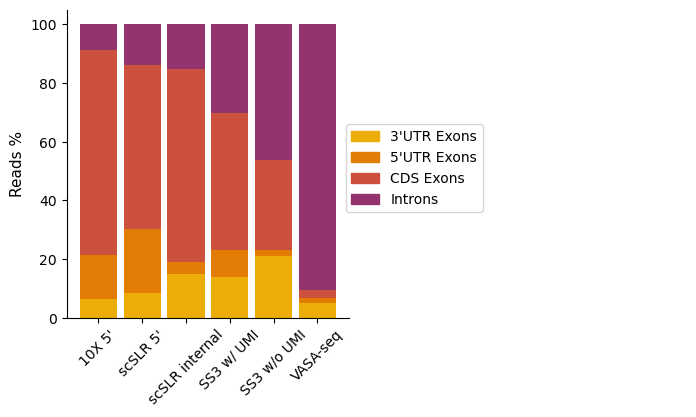

In [83]:
fig, ax = plt.subplots(1, 2, figsize=(8,4), gridspec_kw={'width_ratios': [3, 3]})

width = 0.85     # the width of the bars: can also be len(x) sequence

#palette = sns.color_palette(palette='Blues',n_colors=6)
palette = plotly_map[5:]


ax[0].bar(pivot.index, pivot["3'UTR_Exons"], width, color=palette[0])
ax[0].bar(pivot.index, pivot["5'UTR_Exons"], width, bottom=pivot["3'UTR_Exons"], color=palette[1])
ax[0].bar(pivot.index, pivot["CDS_Exons"], width, bottom=sum([pivot["3'UTR_Exons"], pivot["5'UTR_Exons"]]), color=palette[2])
ax[0].bar(pivot.index, pivot["Introns"], width, bottom=sum([pivot["3'UTR_Exons"], pivot["5'UTR_Exons"],pivot["CDS_Exons"]]), color=palette[3])


ax[0].spines.right.set_visible(False)
ax[0].spines.top.set_visible(False)

ax[0].set_ylabel('Reads %', fontsize=11)

ax[0].set_xticklabels(["10X 5'","scSLR 5'", "scSLR internal", "SS3 w/ UMI", "SS3 w/o UMI", "VASA-seq"])
ax[0].tick_params(axis='x', labelrotation=45) 


colors = {"3'UTR Exons":palette[0], 
          "5'UTR Exons":palette[1],
          "CDS Exons":palette[2],
          "Introns":palette[3]
         }         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]

ax[1].legend(handles, labels, bbox_to_anchor=(-0.2, 0.15, 0.5, 0.5))

ax[1].spines.right.set_visible(False)
ax[1].spines.top.set_visible(False)
ax[1].spines.bottom.set_visible(False)
ax[1].spines.left.set_visible(False)

ax[1].tick_params( 
    bottom=False,        
    labelbottom=False, 
    left=False,
    labelleft=False, 
            ) 

fig.savefig(output_dir+'read_distribution.pdf')
